In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import tensorflow as tf
!pip install contractions
import contractions
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
import collections
import seaborn as sns
sns.set_theme(style="whitegrid")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/ML_Challenge/spam.csv")
# df.head()

In [ ]:
import chardet
with open('/content/drive/MyDrive/ML_Challenge/spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [ ]:
spam_data = pd.read_csv("/content/drive/MyDrive/ML_Challenge/spam.csv",encoding='ISO-8859-1')
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# get necessary columns
df = spam_data[['v2', 'v1']]
# renaming the columns
df = df.rename(columns={'v2' : 'messages', 'v1' : 'label'})
df.head()

,messages,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [ ]:
df.shape

(5572, 2)

# EDA

In [ ]:
df.isnull().sum()

messages    0
label       0
dtype: int64

<Axes: xlabel='label', ylabel='count'>

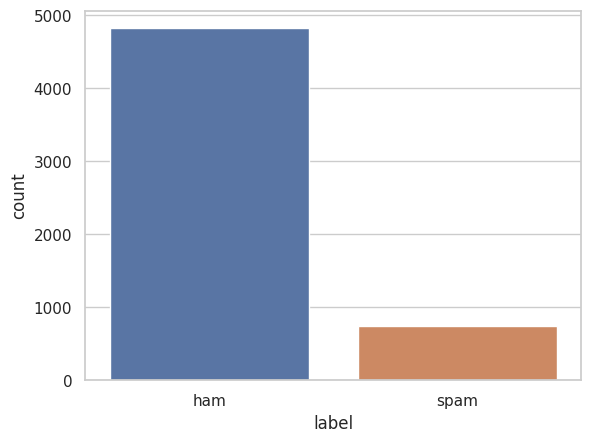

In [ ]:
sns.countplot(x=df["label"])

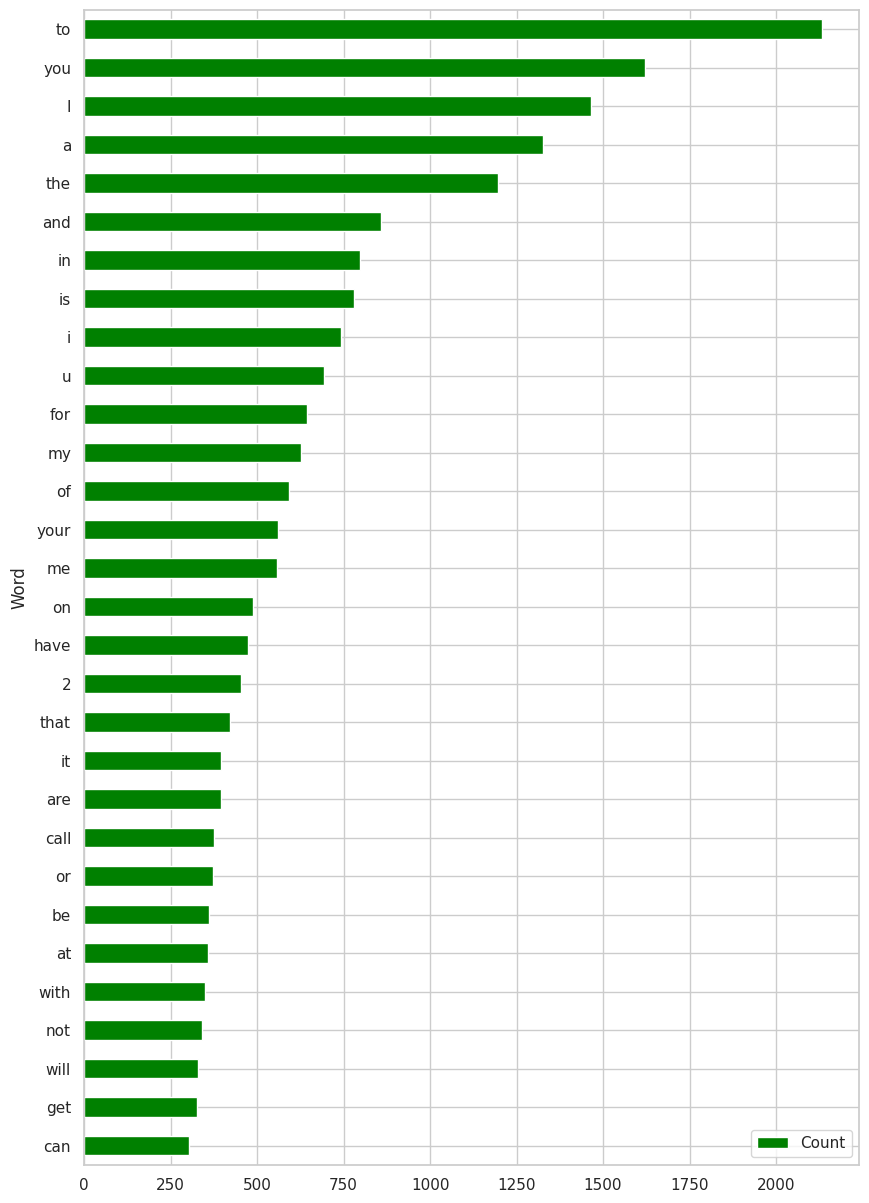

In [ ]:
def word_count_plot(df):
     # finding words along with count
     word_counter = collections.Counter([word for sentence in df for word in sentence.split()])
     most_count = word_counter.most_common(30) # 30 most common words
     # sorted data frame
     most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count")
     most_count.plot.barh(x = "Word", y = "Count", color="green", figsize=(10, 15))
word_count_plot(df["messages"])

# Preprocessing the dataset

In [ ]:
STOPWORDS = set(stopwords.words('english'))
lem = WordNetLemmatizer()
def clean_text(text):
    sms = contractions.fix(text) # converting shortened words to original (Eg:"I'm" to "I am")
    sms = sms.lower() # lower casing the sms
    sms = re.sub(r'https?://S+|www.S+', "", sms).strip() #removing url
    sms = re.sub("[^a-z ]", "", sms) # removing symbols and numbes
    sms = sms.split() #splitting
    # lemmatization and stopword removal
    sms = [lem.lemmatize(word) for word in sms if not word in set(stopwords.words("english"))]
    sms = " ".join(sms)
    return sms

In [ ]:
# cleaning the text
df['clean_text'] = df['messages'].apply(clean_text)
df.head()

,messages,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,ham,dun say early hor c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah think go usf life around though


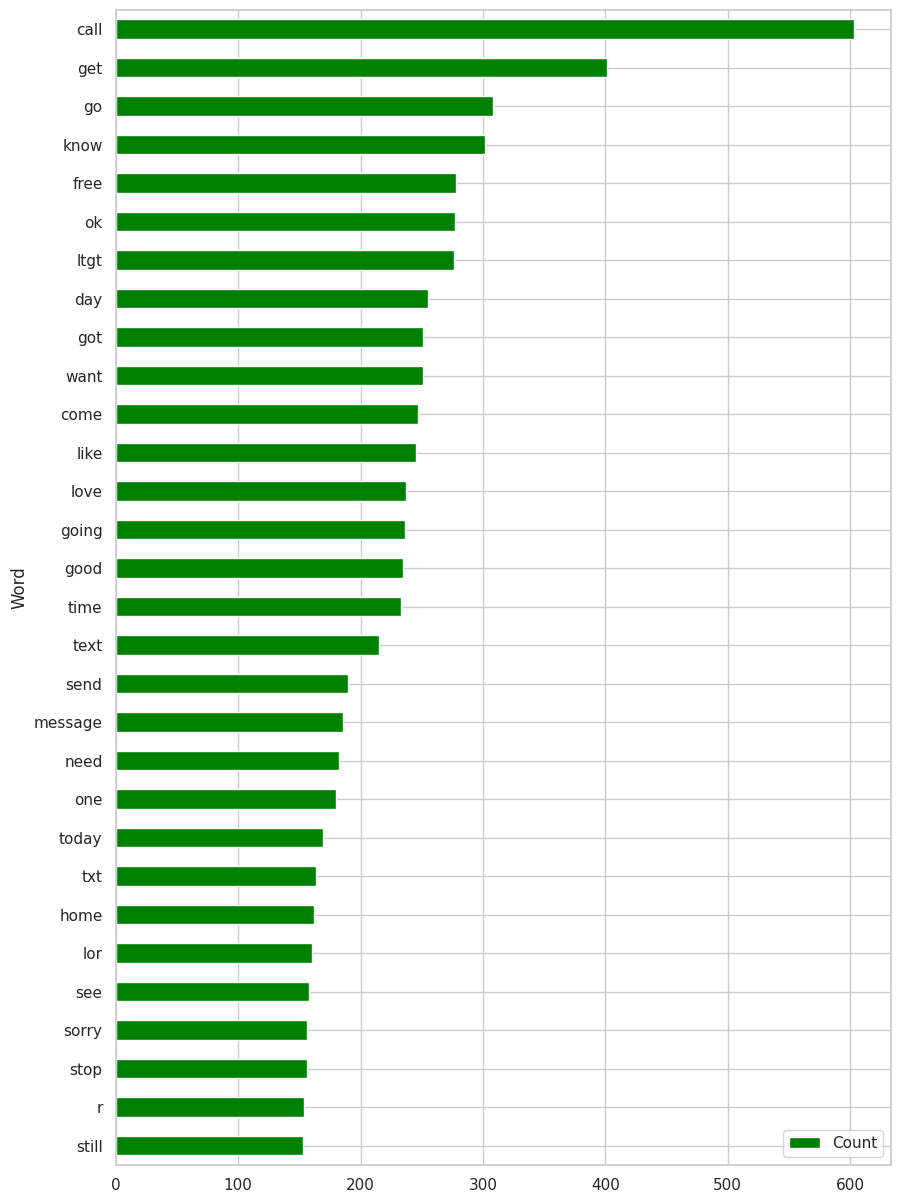

In [ ]:
def word_count_plot(df):
     # finding words along with count
     word_counter = collections.Counter([word for sentence in df for word in sentence.split()])
     most_count = word_counter.most_common(30) # 30 most common words
     # sorted data frame

     most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count")
     most_count.plot.barh(x = "Word", y = "Count", color="green", figsize=(10, 15))
word_count_plot(df["clean_text"])

In [ ]:
# Label Encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform(df["label"])
df.head()

,messages,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,ham,dun say early hor c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah think go usf life around though


In [ ]:
X = df["clean_text"]
# Tokenizer
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer() #initializing the tokenizer
tokenizer.fit_on_texts(X)# fitting on the sms data
text_to_sequence = tokenizer.texts_to_sequences(X) # creating the numerical sequence

In [ ]:
for i in range(5):
           print("Text               : ",X[i] )
           print("Numerical Sequence : ", text_to_sequence[i])

Text               :  go jurong point crazy available bugis n great world la e buffet cine got amore wat
Numerical Sequence :  [3, 3575, 255, 549, 522, 1028, 35, 56, 236, 845, 80, 2411, 1029, 9, 3576, 70]
Text               :  ok lar joking wif oni
Numerical Sequence :  [6, 220, 1173, 328, 1539]
Text               :  free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
Numerical Sequence :  [5, 342, 582, 724, 92, 1540, 846, 478, 1541, 147, 175, 17, 1540, 221, 342, 2412, 23, 2413, 263, 2414]
Text               :  dun say early hor c already say
Numerical Sequence :  [142, 48, 256, 2415, 69, 75, 48]
Text               :  nah think go usf life around though
Numerical Sequence :  [774, 33, 3, 725, 86, 121, 195]


# Model Training

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer


In [ ]:
X = df["clean_text"]
y = df["label"]

In [ ]:
def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)

    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)

#     cv_score = cross_val_score(model, X, y, cv=5)
#     print("CV Score:", np.mean(cv_score)*100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 96.05168700646087
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       0.99      0.72      0.83       187

    accuracy                           0.96      1393
   macro avg       0.97      0.86      0.90      1393
weighted avg       0.96      0.96      0.96      1393



In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

Accuracy: 96.19526202440775
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       0.99      0.72      0.84       187

    accuracy                           0.96      1393
   macro avg       0.98      0.86      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [ ]:
from sklearn.svm import SVC
model = SVC(C=3)
classify(model, X, y)

Accuracy: 98.27709978463747
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       0.99      0.88      0.93       187

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 97.20028715003589
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       1.00      0.79      0.88       187

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

